In [1]:
from PIL.Image import open, fromarray
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

In [2]:
archive = '/home/muhammad-ali/working/base_data'
faulty_img_dir = os.path.join(archive, 'images/image_58.jpg')
faulty_mask_dir = os.path.join(archive, 'masks_01/mask_58.jpg')
save_dir = os.path.join(archive, 'saved.jpg')

faulty_image = open(faulty_img_dir)
faulty_mask = open(faulty_mask_dir)
faulty_mask = np.array(open(faulty_mask_dir))
clean_mask = (2*faulty_mask> 1).astype(np.int8)
before_saving = fromarray(clean_mask).convert('L')

#### Trying to see whether the problem is illusional and from the side of PIL

In [3]:
before_saving.save(save_dir, 'JPEG')
cv_retrieved = 125*(cv.imread(save_dir)) # 125 because there are 2's present in the mask

frequency of [0,1,2] respectively [395192  14264    144]


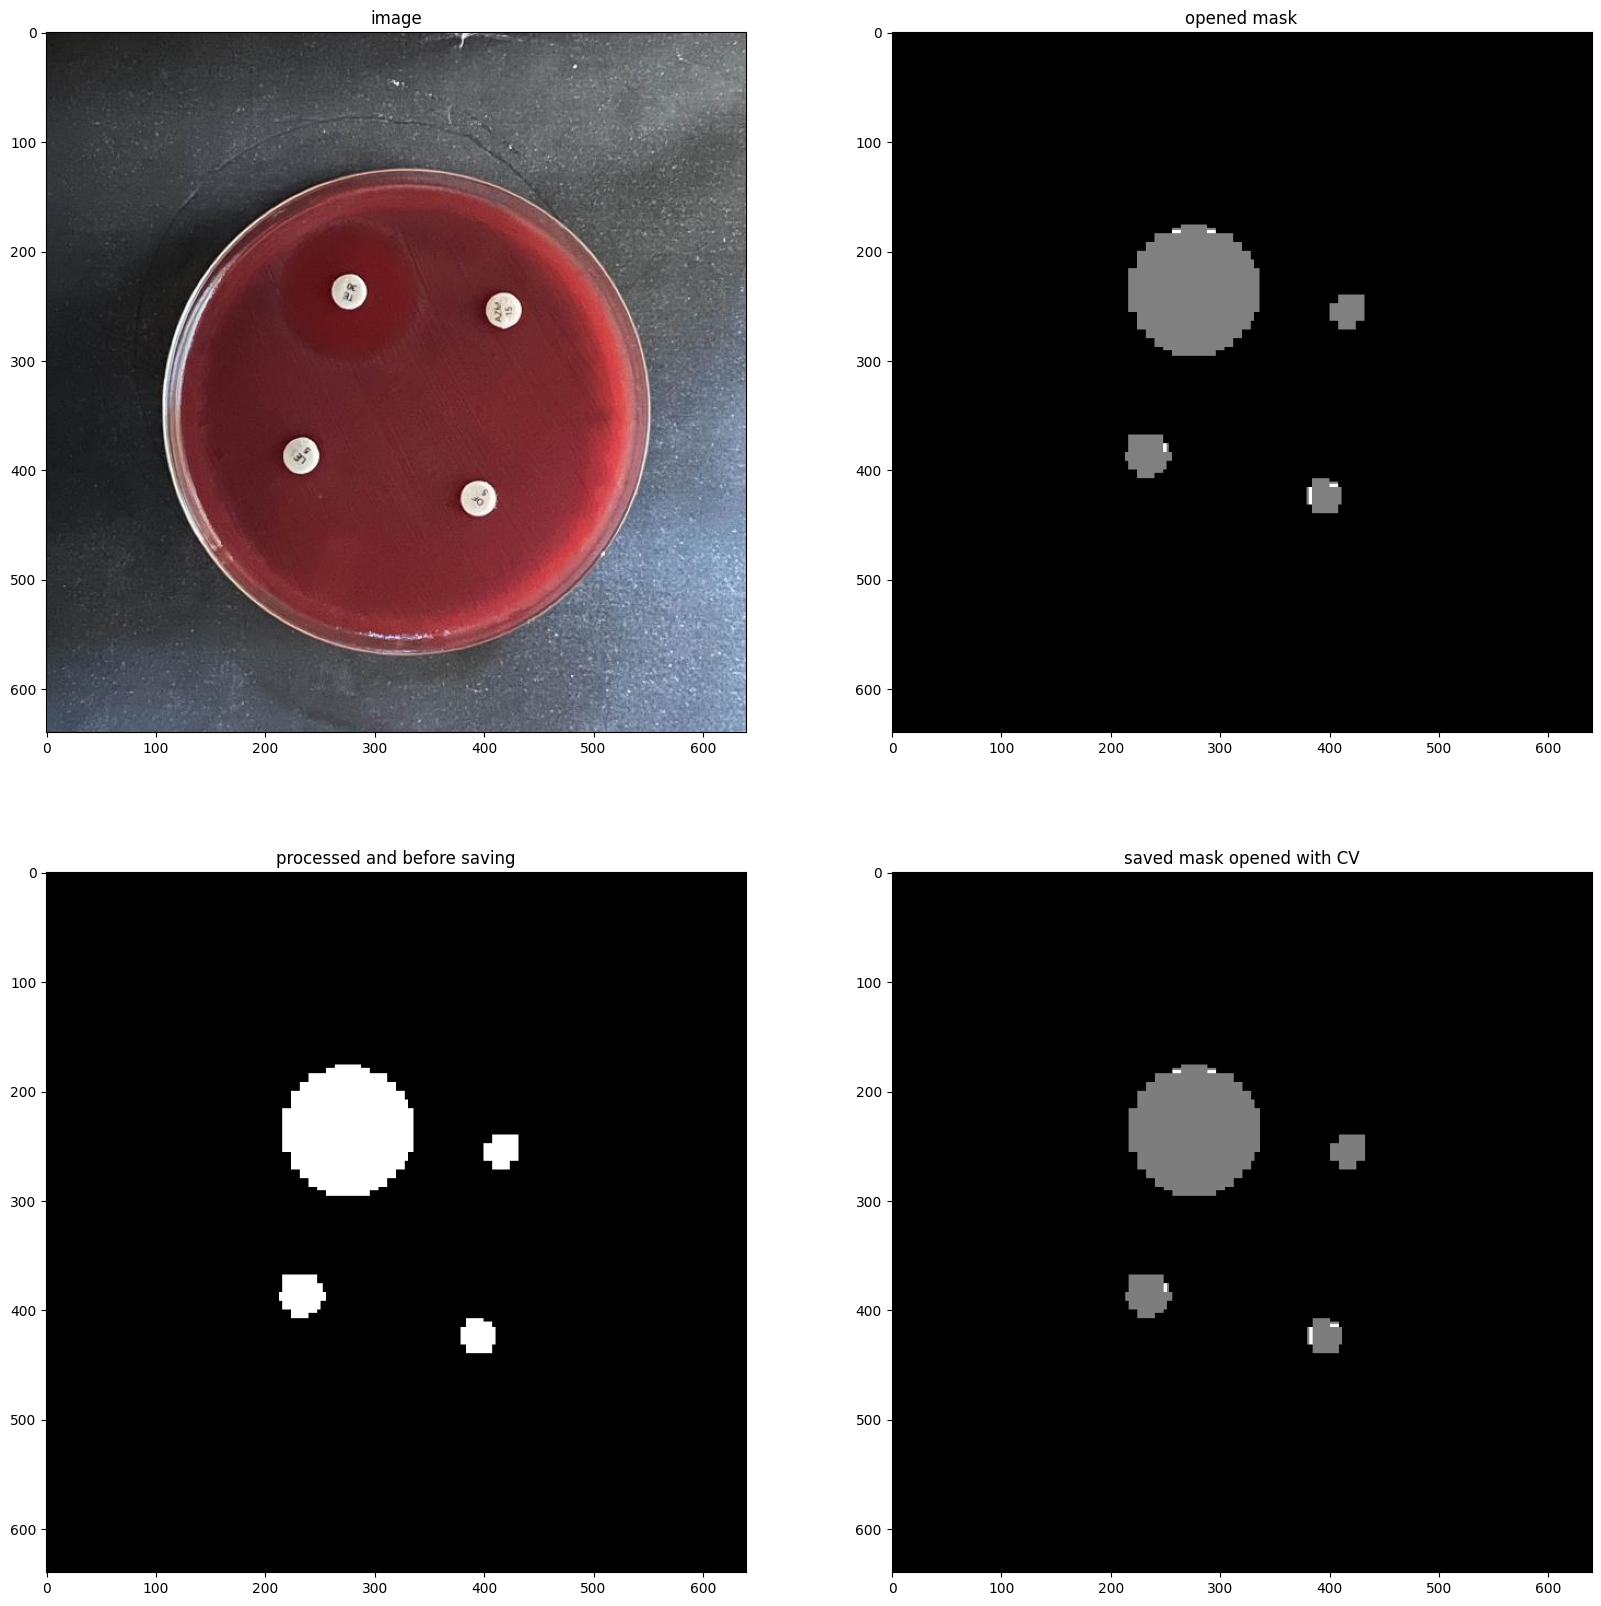

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title('image')
plt.imshow(faulty_image)
plt.subplot(2,2,2)
plt.title('opened mask')
plt.imshow(faulty_mask, 'gray')
plt.subplot(2,2,3)
plt.title('processed and before saving')
plt.imshow(before_saving, 'gray')
plt.subplot(2,2,4)
plt.title('saved mask opened with CV')
plt.imshow(cv_retrieved, 'gray')

# counting the number of present individual values
print(f"frequency of [0,1,2] respectively {np.bincount(np.array(faulty_mask).reshape(1,-1)[0])}")

### Derivations from above illustrations
 It can be seen that PIL.Image.save is causing troubles. PIL.Image.open is not exacerbating the problem. 

### Trying another example
 To see whether we actually have this problem inside our actual dataset

frequency of [0,1,2] respectively [273714 475062   1224]


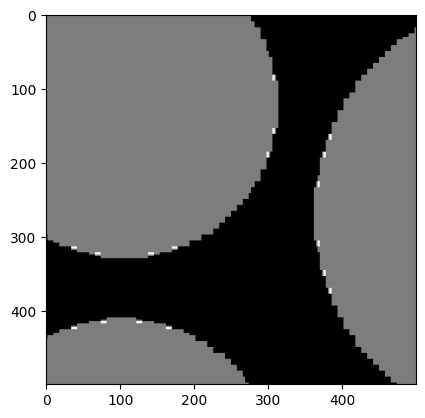

In [5]:
another = cv.imread(os.path.join(archive, 'masks_01/mask_1.jpg'))
another = another[1750:2250,1750:2250]
plt.imshow(125*another)
# counting how many values are present
print(f"frequency of [0,1,2] respectively {np.bincount(np.array(another).reshape(1,-1)[0])}")

#### Trying to save and retrieve the image using CV2 module
 This ascertains whether the problem is with PIL.Image.open or PIL.Image.save

with CV [1185576   42792     432]
with PIL [395192  14264    144]


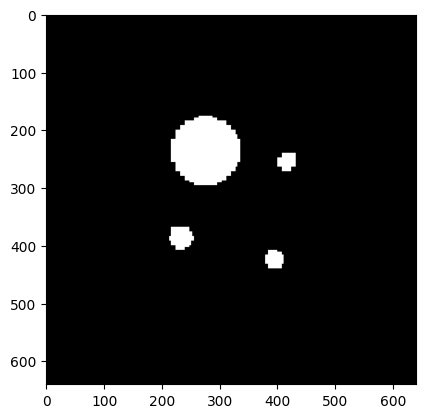

In [6]:
cv_save_dir = os.path.join(archive, 'cv_saved.jpg')
cv.imwrite(cv_save_dir, faulty_mask)
cv_test = cv.imread(cv_save_dir)
PIL_test = open(cv_save_dir)
plt.imshow(255*cv_test, 'gray')
#counting how many values are present inside the picture
print(f"with CV {np.bincount(np.array(cv_test).reshape(1,-1)[0])}")
print(f"with PIL {np.bincount(np.array(PIL_test).reshape(1,-1)[0])}")

## Conclusion
 As can be seen from the above image the sudden popping up of 2s are coming out of PIL package's save function. When the images are cleaned and subsequently saved and opened using only CV2 package this problem is not encountered. Also using the PIL.Image.open() without PIL.Image.save funtion this problem does not come out. 
 * The usage of PIL.Image.save sohuld be discouraged to avoid mess.

### Problems
 * As proved, the actual presence of 2's in our dataset is the problem and should be dealt with
 * As seen, masks are box-like for small images, which doesn't show up in the first produced masks. Most probably they were the result of resizing to match the size of actual images.